In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget
%pdb off

from pyCascade import probePost, physics, utils
from pyCascade.probeReadWrite import read_probes_file_switch
from filloutVentilationStats import *
from matplotlib import pyplot as plt
from matplotlib import cm, colors
import numpy as np
import scipy as sp
import os
from IPython.core.debugger import set_trace
import pandas as pd
import seaborn as sns
from fnmatch import fnmatch
from cycler import cycler
import plotly.express as px
import plotly

plt.rcParams['figure.dpi'] = 140
im_scaling = .75
plt.rcParams['figure.figsize'] = [6.4 * im_scaling, 4.8 * im_scaling]

category =  "config2"

############ Universal ################
scratch_home = os.getenv('SCRATCH') #need to set SCRATCH (even if there is no real SCRATCH) to the location where results are written
scratch_dir = f'{scratch_home}/Cascade/city_block_cfd'
home_dir = !pwd
home_dir = home_dir[0]

display(scratch_dir)
display(home_dir)
plt.close('all')

Automatic pdb calling has been turned OFF


'/scratch/users/nbachand/Cascade/city_block_cfd'

'/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd'

In [2]:
hm = 6
window_dim = hm/2/4
velTenMeters = 4
T_ref = 5
rho = 1.225

velocity_scaling = 1/velTenMeters
ventilation_scaling = velocity_scaling/(window_dim**2)

@utils.no_kwargs
@utils.dict_apply
def norm_vel(df):
    return df * velocity_scaling

@utils.no_kwargs
@utils.dict_apply
def norm_vent(df):
    return df * ventilation_scaling

@utils.no_kwargs
@utils.dict_apply
def norm_Temp(df):
    return df / T_ref

@utils.no_kwargs
@utils.dict_apply
def get_Cp(df):
    return df / (0.5 * rho * velTenMeters**2)

@utils.no_kwargs
@utils.dict_apply
def abs_values(df):
    return df.abs()

@utils.no_kwargs
@utils.dict_apply
def flip_data(df):
    return -df

In [3]:
run = 47
probes_dir = f'{scratch_dir}/CHARLES/{category}/R{run}/probes/probesOut'
oak_probes_dir =  f'{home_dir}/CHARLES/{category}/R{run}/probes/probesOut_parquet/'

In [4]:
start = 40000# 30000
stop = 120000
by = 1

In [5]:
# probes = probePost.Probes(probes_dir, directory_parquet=oak_probes_dir, file_type = "csv")
# probes.to_parquet(overwrite=True)

probes = probePost.Probes(probes_dir, directory_parquet = oak_probes_dir, file_type = "parquet")


In [6]:
start -= probes.probe_steps[0]
stop -= probes.probe_steps[0]

display(start, stop)

40000

120000

In [7]:
nameKey = read_probes_file_switch(f"{probes_dir}/../locations/nameKey_extraProbe.txt")
nameKey = nameKey.compute()

extraProbe = nameKey.copy()
extraProbe = pd.concat([extraProbe, probes.locations["extraProbe"]], axis = "columns")
df = probes.statistics(
    names = [name for name in  probes.probe_names if "extraProbe" in name], 
    steps = [probes.probe_steps[stop]],
    quants = ["comp(u_avg,0)", "comp(u_avg,1)", "comp(u_avg,2)", "mag(u)_avg", "p_avg", "D_avg", "S_avg", "T_avg"],
    parrallel=False
    )
extraProbe = pd.concat([extraProbe, df], axis = "columns")
extraProbe.set_index(0, inplace=True)
extraProbe = extraProbe.rename(columns=lambda x: f"EP_{x}")
extraProbe = extraProbe.rename(index=lambda x: x.replace("extraProbe_", ''))
display(extraProbe)

# del probes

processing data took 9 seconds


EP_x  EP_y    EP_z      EP_D_avg  EP_S_avg  \
0                                                                    
roof_sl                44.00  12.0   60.00  3.653138e-11  0.004183   
xwindow_0-0_sl         36.55   1.5   58.00  1.685580e-18  0.011240   
zwindow_0-0_sl         40.00   1.5   54.55 -1.395506e-21 -0.000479   
xwindow_0-1_sl         36.55   1.5   62.00  2.974980e-21  0.055688   
zwindow_0-1_sl         40.00   1.5   65.45 -2.715956e-20  0.032847   
...                      ...   ...     ...           ...       ...   
zwindow_0-1_h_0-2_Bxz -56.00   1.5 -113.45  1.003678e-13  0.000625   
zwindow_1-0_h_0-2_Bxz -60.00   1.5 -102.55 -1.338496e-17  0.018793   
zwindow_1-1_h_0-2_Bxz -60.00   1.5 -113.45  2.592951e-15  0.008809   
zwindow_2-0_h_0-2_Bxz -64.00   1.5 -102.55 -8.190056e-16  0.126565   
zwindow_2-1_h_0-2_Bxz -64.00   1.5 -113.45  9.209988e-21  0.000062   

                           EP_T_avg  EP_comp(u_avg,0)  EP_comp(u_avg,1)  \
0                                                                         
roof_sl                0.000000e+00          2.515169         -0.265950   
xwindow_0-0_sl         1.447053e-17         -0.801700         -1.131960   
zwindow_0-0_sl        -7.991753e-21          0.694268          0.224098   
xwindow_0-1_sl         1.078656e-20         -0.429170          0.219392   
zwindow_0-1_sl        -1.665455e-19          0.312039         -1.442867   
...                             ...               ...               ...   
zwindow_0-1_h_0-2_Bxz  8.934774e-18          2.307927         -0.916696   
zwindow_1-0_h_0-2_Bxz -6.210548e-24          0.241175         -0.083338   
zwindow_1-1_h_0-2_Bxz -1.727746e-18          1.905705          0.106274   
zwindow_2-0_h_0-2_Bxz -5.725156e-18         -0.796117          0.366030   
zwindow_2-1_h_0-2_Bxz  5.171614e-20          1.420487          0.427180   

                       EP_comp(u_avg,2)  EP_mag(u)_avg  EP_p_avg  
0                                                                 
roof_sl                        3.542016       4.352320  0.683045  
xwindow_0-0_sl                 1.639886       2.147855  0.551389  
zwindow_0-0_sl                 0.200384       0.756560  2.850061  
xwindow_0-1_sl                 2.891609       2.931505 -2.983326  
zwindow_0-1_sl                 0.081371       1.478463 -2.412304  
...                                 ...            ...       ...  
zwindow_0-1_h_0-2_Bxz          0.226856       2.493657  3.267049  
zwindow_1-0_h_0-2_Bxz         -0.415955       0.487985 -2.419697  
zwindow_1-1_h_0-2_Bxz          0.114794       1.912115  2.581430  
zwindow_2-0_h_0-2_Bxz         -0.172884       0.893123 -4.066911  
zwindow_2-1_h_0-2_Bxz          1.292575       1.967490  3.746306  

[240 rows x 11 columns]

In [8]:
qoisOutputed = [
    "mass_flux",
    "mass_flux(p)",
    "mass_flux(T)",
    "mass_flux(D)",
    "mass_flux(S)",
    "sn_prod(u)",
    "sn_prod(p)",
    "sn_prod(abs(u))",
    "sn_prod(u**2)"
]
qois = qoisOutputed

# probes = probePost.Probes(probes_dir, directory_parquet = oak_probes_dir, probe_type = "FLUX_PROBES", flux_quants = qoisOutputed, file_type="csv")
# probes.to_parquet(overwrite = True)

probes = probePost.Probes(probes_dir, directory_parquet = oak_probes_dir, probe_type = "FLUX_PROBES", flux_quants = qoisOutputed, file_type = "parquet")



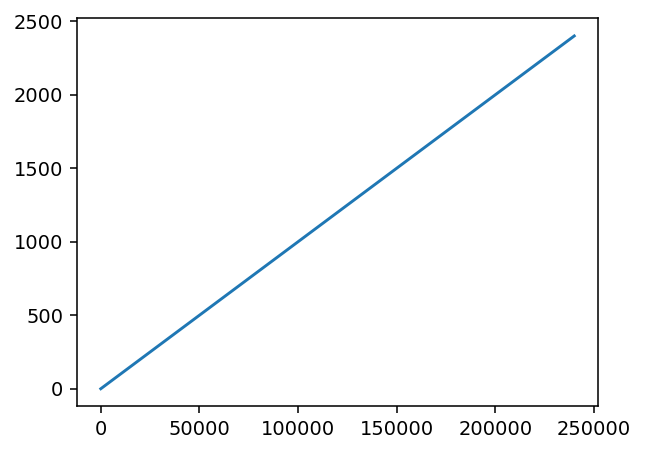

In [9]:
plt.figure()
plt.plot(probes.probe_steps, probes.probe_times)
plt.show()

In [10]:
# plt.figure()
# foo_mass = probes.data[("xwindow_0-0_h_3-0_Bx", qoisOutputed[0])].compute()
# foo_u = probes.data[("xwindow_0-0_h_3-0_Bx", qoisOutputed[1])].compute()
# foo_area = probes.areas["xwindow_0-0_h_3-0_Bx"]
# plt.plot(foo_mass.values/foo_u.values)
# plt.ylim(0,1.225*2)


In [11]:
# plt.figure()
# N = len(foo_mass)
# f, E = sp.signal.welch(foo_mass.values, fs = probes.dt, axis = 0, nperseg = N//4, scaling = 'density', detrend = 'constant') 
# plt.loglog(f, E)

## Check Qois


processing data took 1 seconds
processing data took 0 seconds
processing data took 0 seconds


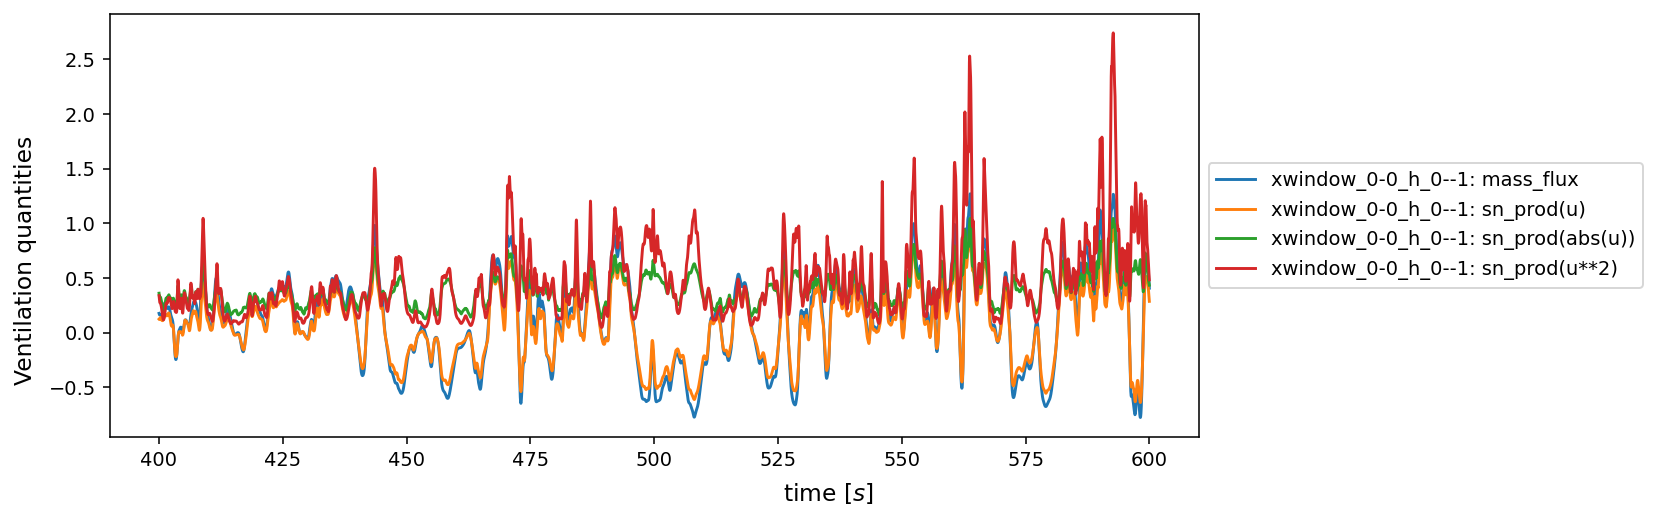

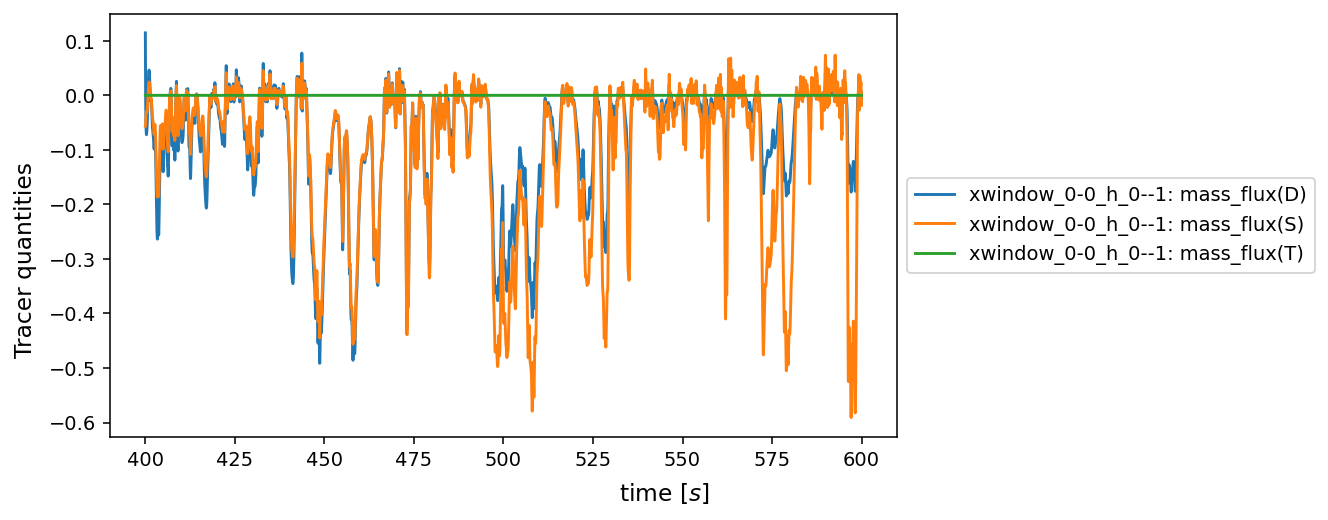

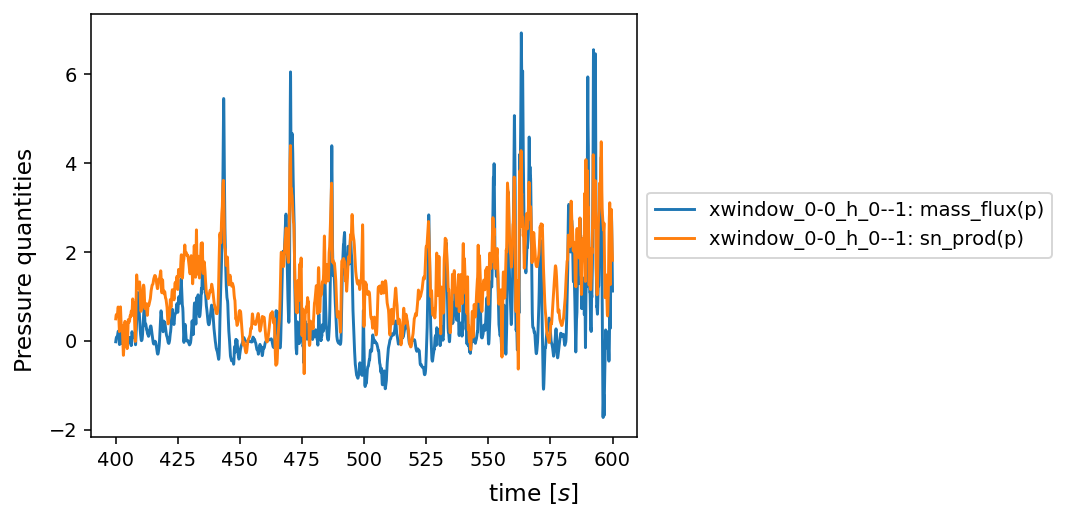

In [12]:
(fig, ax) = probes.time_plots(
    names = [name for name in  probes.probe_names if "xwindow_" in name][0:1], 
    steps = probes.probe_steps[start:60000:by],
    quants = ["mass_flux", "sn_prod(u)", "sn_prod(abs(u))", "sn_prod(u**2)"],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Ventilation quantities',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes.probe_times,
        },
    parrallel=True
    )

(fig, ax) = probes.time_plots(
    names = [name for name in  probes.probe_names if "xwindow_" in name][0:1], 
    steps = probes.probe_steps[start:60000:by],
    quants = ["mass_flux(D)", "mass_flux(S)", "mass_flux(T)"],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Tracer quantities',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes.probe_times,
        },
    parrallel=True
    )

(fig, ax) = probes.time_plots(
    names = [name for name in  probes.probe_names if "xwindow_" in name][0:1], 
    steps = probes.probe_steps[start:60000:by],
    quants = ["mass_flux(p)", "sn_prod(p)"],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Pressure quantities',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes.probe_times,
        },
    parrallel=True
    )

In [13]:
qois.remove("mass_flux(p)")
qois

['mass_flux',
 'mass_flux(T)',
 'mass_flux(D)',
 'mass_flux(S)',
 'sn_prod(u)',
 'sn_prod(p)',
 'sn_prod(abs(u))',
 'sn_prod(u**2)']

## X Flow


In [14]:
@utils.no_kwargs
def norm_norm_blocks(data_dict):
    if category == "config2" and run < 40:
        return probePost.mul_names(data_dict, [name for name in probes.probe_names if "Bxz" in name or "Bz" in name], -1)
    return data_dict

# (fig, ax) = probes.time_plots(
#     names = [name for name in  probes.probe_names if "xwindow_" in name], 
#     steps = probes.probe_steps[start:60000:by],
#     quants = qois,
#     plot_params = {
#         'stack span' : 'y',
#         'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
#         'xlabel' : 'time $[s]$',
#         'horizontal spacing' : probes.probe_times,
#         },
#     processing = [norm_vent, norm_norm_blocks],
#     parrallel=True
#     )

df = probes.statistics(
    names = [name for name in  probes.probe_names if "xwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    processing = [norm_norm_blocks],
    parrallel=False
    )

x_mean = df.map(probePost.time_average)
x_rms = df.map(probePost.time_rms)
x_net = df.map(abs)
x_net = x_net.map(probePost.time_average)

dfs_calced = [x_mean, x_rms, x_net]
calcs = ["mean", "rms", "net"]

for i, calc in enumerate(calcs):
    dfs_calced[i].columns = [f"{calc}-{c}" for c in dfs_calced[i].columns]

x_flowStats = pd.concat(dfs_calced, axis = "columns")


processing data took 56 seconds


In [15]:
# plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/xwindows', bbox = "tight")

# x_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xmean.csv')
# x_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xrms.csv')
# x_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xnet.csv')

## Z Flow


In [16]:
@utils.no_kwargs
def norm_norm_windows(data_dict):
    return probePost.mul_names(data_dict, [name for name in probes.probe_names if fnmatch(name, "*window_?-1*")], -1)

@utils.no_kwargs
def norm_norm_blocks(data_dict):
    if category == "config2" and run < 40:
        return probePost.mul_names(data_dict, [name for name in probes.probe_names if "Bxz" in name or "Bx" in name], -1)
    return data_dict

# (fig, ax) = probes.time_plots(
#     names = [name for name in  probes.probe_names if "zwindow" in name], 
#     steps = probes.probe_steps[start:stop:by],
#     quants = qois,
#     plot_params = {
#         'stack span' : 'y',
#         'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
#         'xlabel' : 'time $[s]$',
#         'horizontal spacing' : probes.probe_times,
#         },
#     processing = [norm_vent, norm_norm_windows, norm_norm_blocks],
#     parrallel=True
#     )

df = probes.statistics(
    names = [name for name in  probes.probe_names if "zwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    processing = [norm_norm_windows, norm_norm_blocks],
    parrallel=False
    )

z_mean = df.map(probePost.time_average)
z_rms = df.map(probePost.time_rms)
z_net = df.map(abs)
z_net = z_net.map(probePost.time_average)

dfs_calced = [z_mean, z_rms, z_net]
calcs = ["mean", "rms", "net"]

for i, calc in enumerate(calcs):
    dfs_calced[i].columns = [f"{calc}-{c}" for c in dfs_calced[i].columns]

z_flowStats = pd.concat(dfs_calced, axis = "columns")

processing data took 159 seconds


In [17]:
# plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/zwindows', bbox_inches = "tight")

# z_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/zmean.csv')
# z_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/zrms.csv')
# z_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/znet.csv')

## Y Flow


In [18]:
# (fig, ax) = probes.time_plots(
#     names = [name for name in  probes.probe_names if "skylight" in name], 
#     steps = probes.probe_steps[start:stop:by],
#     quants = qois,
#     plot_params = {
#         'stack span' : 'y',
#         'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
#         'xlabel' : 'time $[s]$',
#         'horizontal spacing' : probes.probe_times,
#         },
#     processing = [norm_vent, norm_norm_skylights],
#     parrallel=True
#     )

df = probes.statistics(
    names = [name for name in  probes.probe_names if "skylight" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    processing = [flip_data, norm_norm_blocks],
    parrallel=False
    )

y_mean = df.map(probePost.time_average)
y_rms = df.map(probePost.time_rms)
y_net = df.map(abs)
y_net = y_net.map(probePost.time_average)

dfs_calced = [y_mean, y_rms, y_net]
calcs = ["mean", "rms", "net"]

for i, calc in enumerate(calcs):
    dfs_calced[i].columns = [f"{calc}-{c}" for c in dfs_calced[i].columns]

y_flowStats = pd.concat(dfs_calced, axis = "columns")

processing data took 29 seconds


In [19]:
# plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/ywindows')

# y_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/ymean.csv')
# y_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/yrms.csv')
# y_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/ynet.csv')

## All Flow

In [20]:
def matchNewNamingConvention(input_str):
    # Find the position of the '-' in the string
    split_index = input_str.find('_h_')

    if split_index == -1:
        return input_str #return original if no house number
    
    n1 = int(input_str[split_index+3])
    n2 = int(input_str[split_index+5])
    
    # Modify the numbers
    new_n1 = n1 - 3
    new_n2 = n2 - 2
    
    # Format the output string with the modified numbers
    output_str = f"{new_n1}-{new_n2}"
    
    return f"{input_str[:split_index+3]}{output_str}{input_str[split_index+6:]}"



In [21]:
flowStats = pd.concat([x_flowStats, y_flowStats, z_flowStats], axis = "index")

locations = probes.get_avg_locations()
locations = locations.loc[flowStats.index.values]
areas = {k: v for k, v in probes.areas.items() if k in flowStats.index}
if category == "config2" and run < 40:
    flowStats = flowStats.rename(index=lambda x: matchNewNamingConvention(x))
    locations = locations.rename(index=lambda x: matchNewNamingConvention(x))
    areas = pd.Series(areas).rename(index=lambda x: matchNewNamingConvention(x))
flowStats = addWindowDetails(flowStats, locations, areas, extraProbe)


# apply proper post processing to qois
for qoi in x_flowStats.columns.values:
    if fnmatch(qoi, '*mass_flux*') or fnmatch(qoi, '*sn_prod(*u*)'):
        flowStats[qoi] = flowStats[qoi].apply(norm_vent)
    if fnmatch(qoi, '*sn_prod(u**2)"'):
        flowStats[qoi] = flowStats[qoi].apply(norm_vel) # normalize again because velocity squared
    if fnmatch(qoi, '*mass_flux(T)'):
        flowStats[qoi] = flowStats[qoi].apply(norm_Temp)
    if fnmatch(qoi, '*sn_prod(p)'):
        flowStats[qoi] = flowStats[qoi].apply(get_Cp)

In [22]:
roomQois = ["EP_normal", "EP_shear", "EPR_mag", "EP_mag"]
roomQois += [q for q in x_flowStats.columns.values if 'rms-' not in q]
roomQois.append("rms-sn_prod(p)")
roomQois += ['x', 'y', 'z', 'openingType', 'windowNumber']

connectedWindows = {
    "corner": [
        "xwindow_0-0",
        "zwindow_0-0",
        "skylight_0-0"
    ],
    "single": [
        "zwindow_1-0",
        "skylight_1-0"
    ],
    "dual": [
        "xwindow_0-1",
        "zwindow_0-1",
        "zwindow_1-1",
        "skylight_0-1",
        "skylight_1-1"
       ],
    "cross": [
        "zwindow_2-0",
        "zwindow_2-1",
        "skylight_2-0",
        "skylight_2-1"
    ]
}
sort_order = ["blockType", "houseType", "roomType"]
roomVentilation = roomStatistics(flowStats, connectedWindows, roomQois)

roomVentilation = roomVentilation.sort_values(by = sort_order)
sort_order.append("windowType")
flowStats = flowStats.sort_values(by = sort_order)

roomVentilation["nWindows"] = roomVentilation[roomQois[0]].apply(lambda l: len(l))
roomVentilation["contResid"] = roomVentilation['mean-mass_flux'].apply(lambda l: np.mean(l))

roomVentilation

EP_normal  \
corner_h_0--1_B                  [0.03436889, 0.39726695219085667]   
cross_h_0--1_B                  [-0.03925726705873835, 0.59373683]   
dual_h_0--1_B        [-1.218031887868533, -0.79597792, 0.38337125]   
single_h_0--1_B                               [0.4300655354539577]   
corner_h_0--2_B                           [0.81842994, 0.15673606]   
...                                                            ...   
single_h_0-2_Bz                                [0.109379881212008]   
corner_sl_Bz     [0.350435442887097, 0.19442660032349932, -0.43...   
cross_sl_Bz      [-0.8085063781703965, -0.21755549, 0.24403408,...   
dual_sl_Bz       [-0.4449195967698149, -0.5039209044576759, 0.5...   
single_sl_Bz           [-1.2614473167425269, -0.21550007995934758]   

                                                          EP_shear  \
corner_h_0--1_B            [2.0612113280100677, 2.243549218458649]   
cross_h_0--1_B            [3.225621756833814, 0.38499840639981114]   
dual_h_0--1_B    [3.115800493383976, 0.3993360192164278, 0.8521...   
single_h_0--1_B                               [1.8522014475814434]   
corner_h_0--2_B           [1.9210181793260748, 0.7033868256473932]   
...                                                            ...   
single_h_0-2_Bz                               [1.2224863541626945]   
corner_sl_Bz     [5.125269692634877, 1.559257056080419, 2.87283...   
cross_sl_Bz      [3.7703076011428447, 5.331850005407376, 1.5598...   
dual_sl_Bz       [3.152331424741782, 3.510783882652523, 1.60293...   
single_sl_Bz                [2.933735479004147, 1.659776635582207]   

                                                           EPR_mag  \
corner_h_0--1_B           [2.8758089660564345, 2.8758089660564345]   
cross_h_0--1_B            [2.8758089660564345, 2.8758089660564345]   
dual_h_0--1_B    [2.8758089660564345, 2.8758089660564345, 2.875...   
single_h_0--1_B                               [2.8758089660564345]   
corner_h_0--2_B           [2.2316472660563345, 2.2316472660563345]   
...                                                            ...   
single_h_0-2_Bz                                [5.670300731971671]   
corner_sl_Bz     [4.679586959375685, 4.679586959375685, 4.67958...   
cross_sl_Bz      [4.679586959375685, 4.679586959375685, 4.67958...   
dual_sl_Bz       [4.679586959375685, 4.679586959375685, 4.67958...   
single_sl_Bz                [4.679586959375685, 4.679586959375685]   

                                                            EP_mag  \
corner_h_0--1_B                               [2.0614979, 2.27845]   
cross_h_0--1_B                             [3.2258606, 0.70763493]   
dual_h_0--1_B                    [3.345417, 0.8905336, 0.93437563]   
single_h_0--1_B                                        [1.9014748]   
corner_h_0--2_B                            [2.0880945, 0.72063806]   
...                                                            ...   
single_h_0-2_Bz                                        [1.2273699]   
corner_sl_Bz                       [5.137236, 1.571332, 2.9061894]   
cross_sl_Bz          [3.8560215, 5.3362866, 1.5788044, 0.79022444]   
dual_sl_Bz       [3.1835746, 3.5467647, 1.7001438, 1.2336412, 0...   
single_sl_Bz                                [3.1934391, 1.6737081]   

                                                    mean-mass_flux  \
corner_h_0--1_B        [0.07271889239517917, -0.07257699970521168]   
cross_h_0--1_B         [-0.0130010043905781, 0.011557406423006594]   
dual_h_0--1_B    [0.10113194844850903, -0.18964961368717023, 0....   
single_h_0--1_B                           [-0.0013670193348348909]   
corner_h_0--2_B         [-0.2812311903913745, 0.27770628012751486]   
...                                                            ...   
single_h_0-2_Bz                            [0.0013985698501772373]   
corner_sl_Bz     [0.17788275034282955, -0.41905335910715, 0.231...   
cross_sl_Bz      [0.376654733311709, -0.6249898913279444, 0.476

In [23]:

for qoi in roomQois:
    if fnmatch(qoi, '*mass_flux') or fnmatch(qoi, '*sn_prod(u)') or fnmatch(qoi, '*sn_prod(abs(u))'):  # flow quantities
        roomVentilation[qoi] = roomVentilation[qoi].apply(lambda l : sum(np.abs(l))/2)
    if fnmatch(qoi, '*mass_flux(?)') or fnmatch(qoi, '*sn_prod(u**2)') or fnmatch(qoi, 'rms-sn_prod(p)'): # net quantities
        roomVentilation[qoi] = roomVentilation[qoi].apply(lambda l : sum(l))
    elif fnmatch(qoi, '*sn_prod(p)'):
        roomVentilation[qoi] = roomVentilation[qoi].apply(lambda l : sum(l))
    elif qoi in ['x', 'y', 'z']:
        roomVentilation[qoi] = roomVentilation[qoi].apply(lambda l : np.mean(l))
roomVentilation["EPR_mag"] = roomVentilation["EPR_mag"].apply(lambda l: np.mean(l))
roomVentilation["EP_shear"] = roomVentilation["EP_shear"].apply(lambda l: sum(l))
roomVentilation["EP_mag"] = roomVentilation["EP_mag"].apply(lambda l: sum(l))
roomVentilation["EP_normal_mag"] = roomVentilation["EP_normal"].apply(lambda l: sum(np.abs(l)))
roomVentilation["EP_normal_sum"] = roomVentilation["EP_normal"].apply(lambda l: abs(sum(l)))
roomVentilation["EP_normal_ratio"] = roomVentilation["EP_normal_mag"] / (roomVentilation["EP_normal_mag"] + roomVentilation["EP_normal_sum"])
display(roomVentilation)
display(flowStats)

EP_normal   EP_shear  \
corner_h_0--1_B                  [0.03436889, 0.39726695219085667]   4.304761   
cross_h_0--1_B                  [-0.03925726705873835, 0.59373683]   3.610620   
dual_h_0--1_B        [-1.218031887868533, -0.79597792, 0.38337125]   4.367242   
single_h_0--1_B                               [0.4300655354539577]   1.852201   
corner_h_0--2_B                           [0.81842994, 0.15673606]   2.624405   
...                                                            ...        ...   
single_h_0-2_Bz                                [0.109379881212008]   1.222486   
corner_sl_Bz     [0.350435442887097, 0.19442660032349932, -0.43...   9.557358   
cross_sl_Bz      [-0.8085063781703965, -0.21755549, 0.24403408,...  11.452144   
dual_sl_Bz       [-0.4449195967698149, -0.5039209044576759, 0.5...  10.370611   
single_sl_Bz           [-1.2614473167425269, -0.21550007995934758]   4.593512   

                  EPR_mag     EP_mag  mean-mass_flux  mean-mass_flux(D)  \
corner_h_0--1_B  2.875809   4.339948        0.072648          -0.026431   
cross_h_0--1_B   2.875809   3.933496        0.012279          -0.045778   
dual_h_0--1_B    2.875809   5.170326        0.191580          -0.051625   
single_h_0--1_B  2.875809   1.901475        0.000684          -0.013858   
corner_h_0--2_B  2.231647   2.808733        0.279469          -0.027120   
...                   ...        ...             ...                ...   
single_h_0-2_Bz  5.670301   1.227370        0.000699          -0.020230   
corner_sl_Bz     4.679587   9.614757        0.414024          -0.027430   
cross_sl_Bz      4.679587  11.561337        0.844140          -0.054481   
dual_sl_Bz       4.679587  10.636561        0.621349          -0.053532   
single_sl_Bz     4.679587   4.867147        0.020125          -0.026366   

                 mean-mass_flux(S)  mean-mass_flux(T)  mean-sn_prod(abs(u))  \
corner_h_0--1_B          -0.116747                0.0              0.153373   
cross_h_0--1_B           -0.070279                0.0              0.098781   
dual_h_0--1_B            -0.155286                0.0              0.212419   
single_h_0--1_B          -0.015998                0.0              0.033290   
corner_h_0--2_B          -0.153137                0.0              0.242964   
...                            ...                ...                   ...   
single_h_0-2_Bz          -0.033857                0.0              0.049705   
corner_sl_Bz             -0.203956                0.0              0.399883   
cross_sl_Bz              -0.487899                0.0              0.703226   
dual_sl_Bz               -0.299697                0.0              0.545689   
single_sl_Bz             -0.076555                0.0              0.121944   

                 mean-sn_prod(p)  ...  \
corner_h_0--1_B         0.242222  ...   
cross_h_0--1_B          0.000626  ...   
dual_h_0--1_B           0.075708  ...   
single_h_0--1_B         0.064642  ...   
corner_h_0--2_B         0.170357  ...   
...                          ...  ...   
single_h_0-2_Bz         0.191918  ...   
corner_sl_Bz           -0.123873  ...   
cross_sl_Bz             0.511644  ...   
dual_sl_Bz              0.278974  ...   
single_sl_Bz            0.008321  ...   

                                                     openingType  \
corner_h_0--1_B                               [xwindow, zwindow]   
cross_h_0--1_B                                [zwindow, zwindow]   
dual_h_0--1_B                        [xwindow, zwindow, zwindow]   
single_h_0--1_B                                        [zwindow]   
corner_h_0--2_B                               [xwindow, zwindow]   
...                                                          ...   
single_h_0-2_Bz                                        [zwindow]   
corner_sl_Bz                        [skylight, xwindow, zwindow]   
cross_sl_Bz               [skylight, skylight, zwindow, zwindow]   
dual_sl_Bz       [skylight, skylight, xwindow, zwindow, zwind

mean-mass_flux  mean-mass_flux(D)  mean-mass_flux(S)  \
xwindow_0-0_h_0--1        0.072719          -0.010193          -0.035210   
zwindow_0-0_h_0--1       -0.072577          -0.016238          -0.081536   
zwindow_2-0_h_0--1       -0.013001          -0.028416          -0.041214   
zwindow_2-1_h_0--1        0.011557          -0.017362          -0.029065   
xwindow_0-1_h_0--1        0.101132          -0.004830          -0.013904   
...                            ...                ...                ...   
xwindow_0-1_sl_Bz         0.158024          -0.001880          -0.007504   
zwindow_0-1_sl_Bz         0.338286           0.000991           0.005870   
zwindow_1-1_sl_Bz         0.134345          -0.001927          -0.010520   
skylight_1-0_sl_Bz       -0.020482          -0.013362          -0.039087   
zwindow_1-0_sl_Bz         0.019769          -0.013004          -0.037468   

                    mean-mass_flux(T)  mean-sn_prod(abs(u))  mean-sn_prod(p)  \
xwindow_0-0_h_0--1                0.0              0.166755         0.129381   
zwindow_0-0_h_0--1                0.0              0.139991         0.112841   
zwindow_2-0_h_0--1                0.0              0.105819         0.039464   
zwindow_2-1_h_0--1                0.0             -0.091743        -0.038838   
xwindow_0-1_h_0--1                0.0              0.139760         0.000348   
...                               ...                   ...              ...   
xwindow_0-1_sl_Bz                 0.0              0.179879        -0.034520   
zwindow_0-1_sl_Bz                 0.0             -0.276244         0.028454   
zwindow_1-1_sl_Bz                 0.0             -0.160090         0.059031   
skylight_1-0_sl_Bz                0.0             -0.114134        -0.104290   
zwindow_1-0_sl_Bz                 0.0              0.129754         0.112611   

                    mean-sn_prod(u)  mean-sn_prod(u**2)  rms-mass_flux  \
xwindow_0-0_h_0--1         0.045978            0.192084       0.154963   
zwindow_0-0_h_0--1        -0.055221            0.142933       0.152712   
zwindow_2-0_h_0--1        -0.013916            0.086864       0.102117   
zwindow_2-1_h_0--1         0.008485           -0.057013       0.103182   
xwindow_0-1_h_0--1         0.052787            0.134345       0.107585   
...                             ...                 ...            ...   
xwindow_0-1_sl_Bz          0.120579            0.199221       0.160814   
zwindow_0-1_sl_Bz          0.261457           -0.403116       0.135715   
zwindow_1-1_sl_Bz          0.100377           -0.166629       0.151432   
skylight_1-0_sl_Bz        -0.011558           -0.109889       0.105748   
zwindow_1-0_sl_Bz          0.004364            0.118159       0.104844   

                    rms-mass_flux(D)  ...  EP_comp(u_avg,2)  EP_mag(u)_avg  \
xwindow_0-0_h_0--1          0.028053  ...          2.014670       2.061498   
zwindow_0-0_h_0--1          0.037476  ...          0.398439       2.278450   
zwindow_2-0_h_0--1          0.041686  ...         -0.038835       3.225861   
zwindow_2-1_h_0--1          0.032371  ...         -0.593737       0.707635   
xwindow_0-1_h_0--1          0.014491  ...          2.930088       3.345417   
...                              ...  ...               ...            ...   
xwindow_0-1_sl_Bz           0.016202  ...         -0.565969       1.700144   
zwindow_0-1_sl_Bz           0.004411  ...          0.809831       1.233641   
zwindow_1-1_sl_Bz           0.011333  ...          0.945862       0.972437   
skylight_1-0_sl_Bz          0.029378  ...          2.013540       3.193439   
zwindow_1-0_sl_Bz           0.024044  ...          1.633533       1.673708   

                    EP_p_avg    EP_mag  EP_vel_orientation  EP_normal  \
xwindow_0-0_h_0--1 -0.752456  2.061498           90.955268   0.034369   
zwindow_0-0_h_0--1  2.284535  2.278450          100.041325   0.397267   
zwindow_2-0_h_0--1  0.219126  3.225861           89.302719  -0.039257   
zwindow_2-1_h_0--1  1.165375

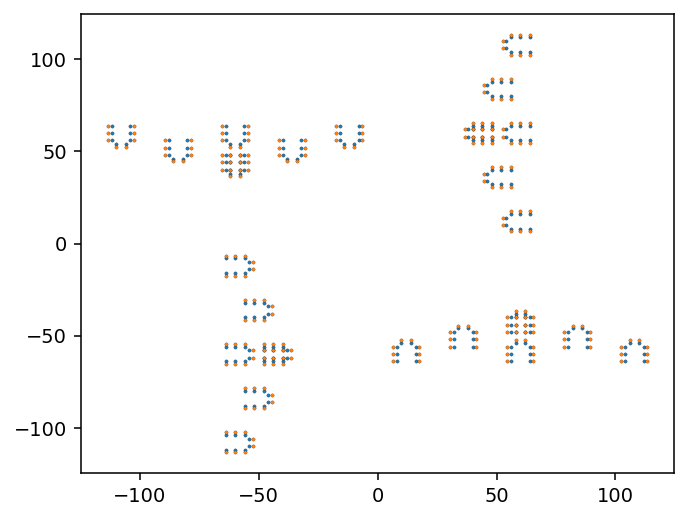

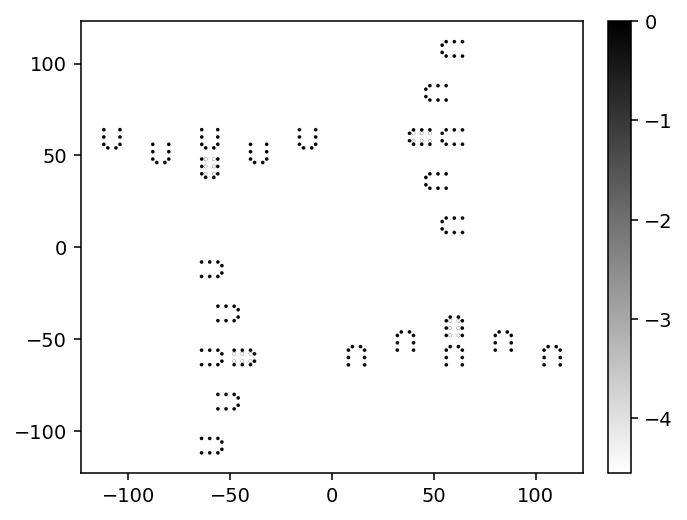

In [24]:
fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, edgecolors="black", linewidths=.1)
im=ax.scatter(flowStats['EP_x'], flowStats['EP_z'], s=4*im_scaling, edgecolors="black", linewidths=.1)


fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["y"] - flowStats["EP_y"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)


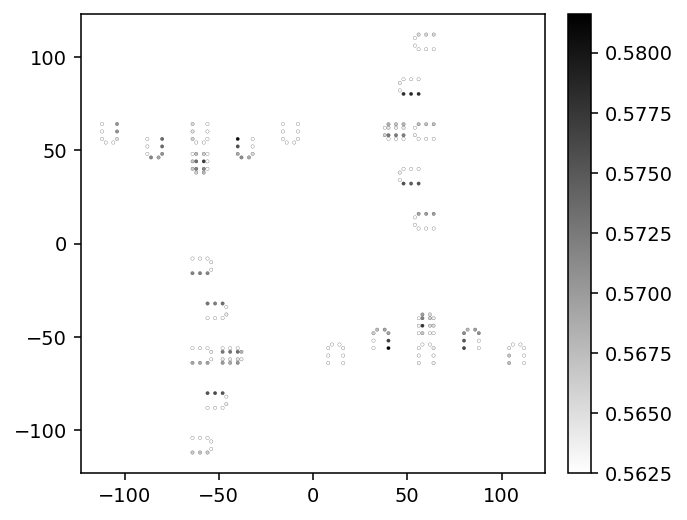

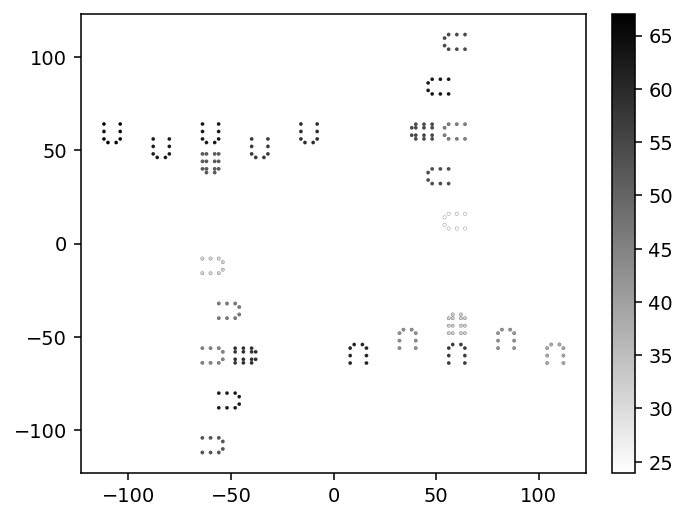

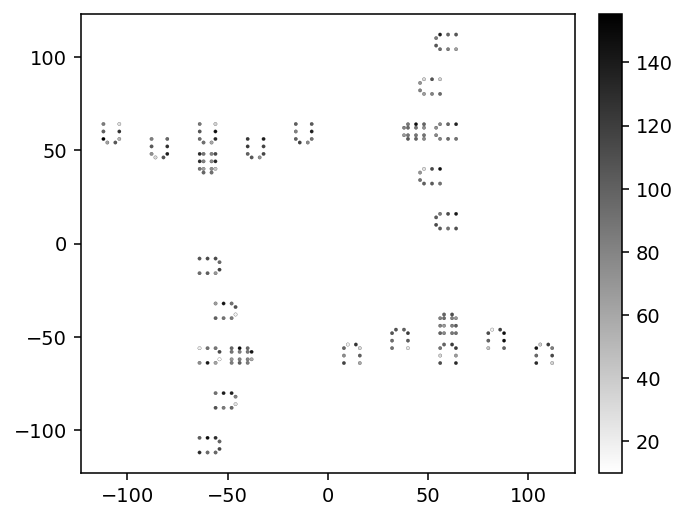

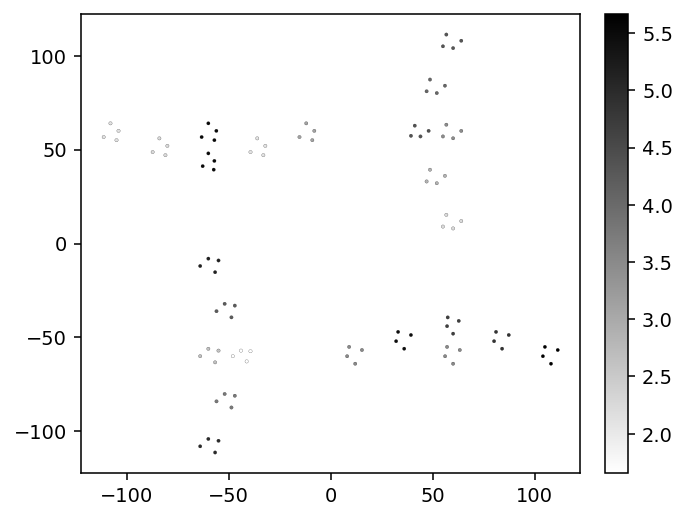

In [25]:

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["area"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/rmsInterior', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["EPR_vel_orientation"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/rmsInterior', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["EP_vel_orientation"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/rmsInterior', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["EPR_mag"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanRooms', bbox_inches="tight")

In [26]:
fig = px.scatter(data_frame = flowStats, x = "EPR_mag", y = "mean-mass_flux", color = "roomType", symbol="roomType")
fig.update_xaxes(title_text='2H Wind Speed')
fig.update_yaxes(title_text='Normalized Ventilation Rate')
# fig.update_coloraxes(title_text='Local Wind Magnitude')
fig.show()
 
fig = px.scatter(data_frame = flowStats, x = "EP_normal", y = "mean-mass_flux", color = "EP_shear", symbol = "roomType")
fig.update_xaxes(title_text='Component of Wind Normal to Window')
fig.update_yaxes(title_text='Normalized Ventilation Rate')
# fig.update_coloraxes(title_text='Local Wind Magnitude')
fig.show()

In [27]:
fig = px.scatter(data_frame = roomVentilation, x = "EPR_mag", y = "mean-mass_flux", color = "roomType", symbol="roomType")
fig.update_xaxes(title_text='2H Wind Speed')
fig.update_yaxes(title_text='Normalized Ventilation Rate')
# fig.update_coloraxes(title_text='Local Wind Magnitude')
fig.show()
 
fig = px.scatter_3d(data_frame = roomVentilation, x = "EP_normal_mag", y = "EP_normal_sum",  z = "mean-mass_flux", color = "roomType", symbol = "roomType")
fig.update_xaxes(title_text='Magnitude/Sum of Window Normal Velocities')
fig.update_yaxes(title_text='Normalized Ventilation Rate')
# fig.update_coloraxes(title_text='Local Wind Magnitude')
fig.show()

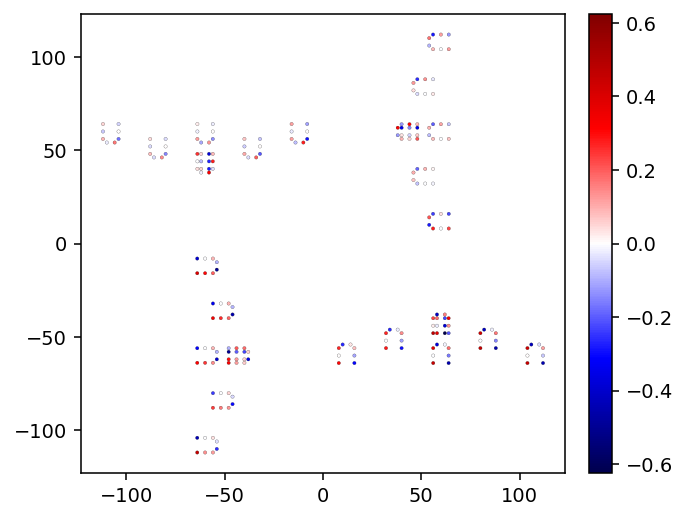

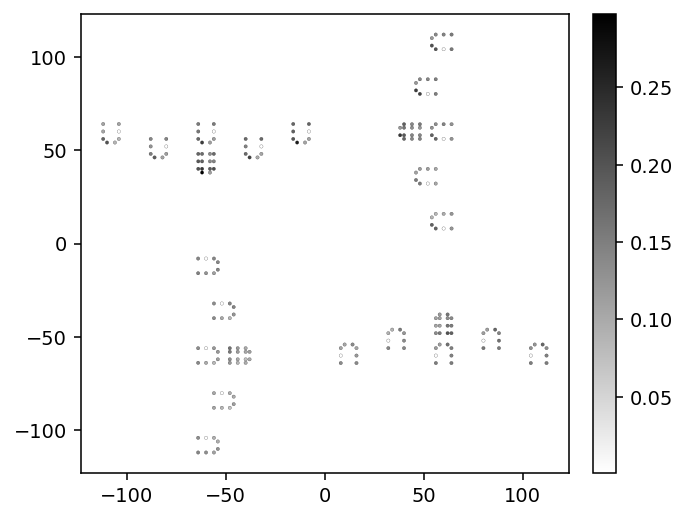

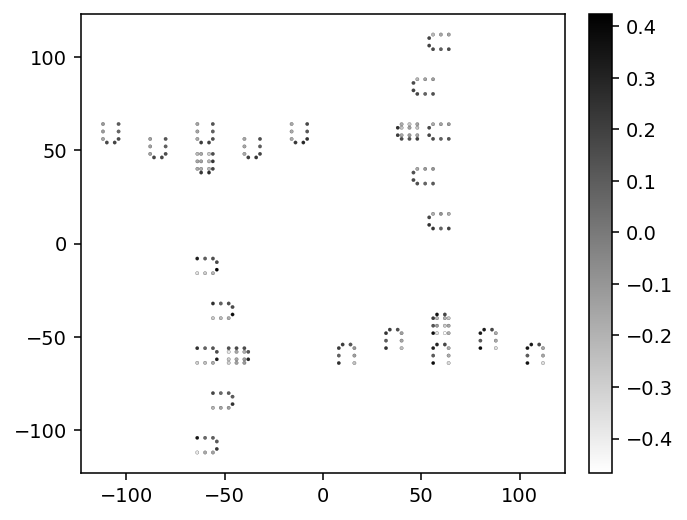

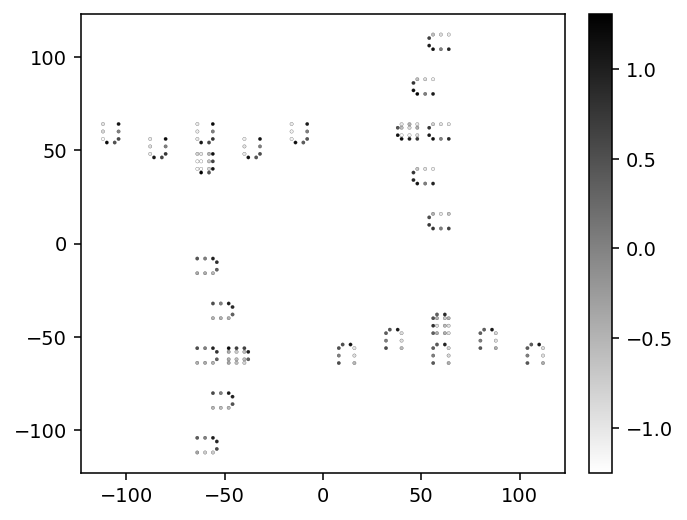

In [28]:
fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["mean-mass_flux"], cmap='seismic', edgecolors="black", linewidths=.1, norm=colors.CenteredNorm())
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/mean-mass_fluxInterior', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["rms-mass_flux"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/rms-mass_fluxInterior', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["mean-sn_prod(abs(u))"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/net-mass_fluxInterior', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["rms-mass_flux"]/flowStats["mean-sn_prod(abs(u))"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/rms-mass_fluxOnet-mass_fluxInterior', bbox_inches="tight")

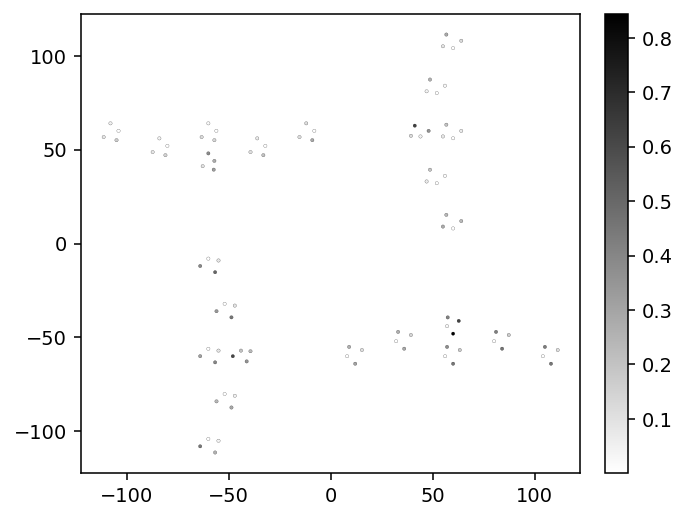

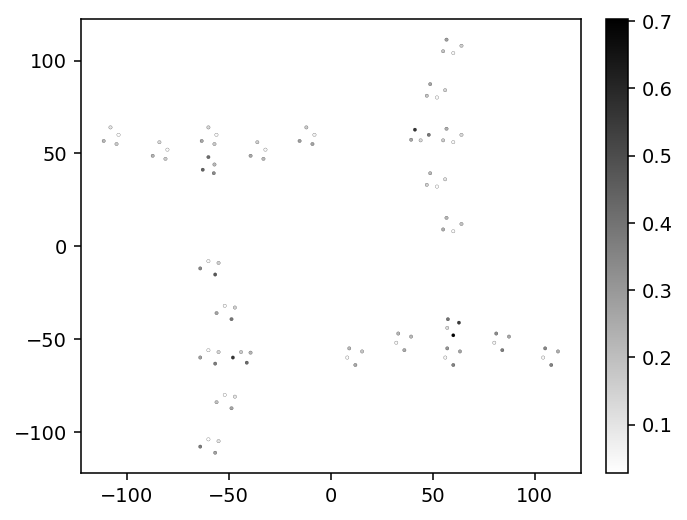

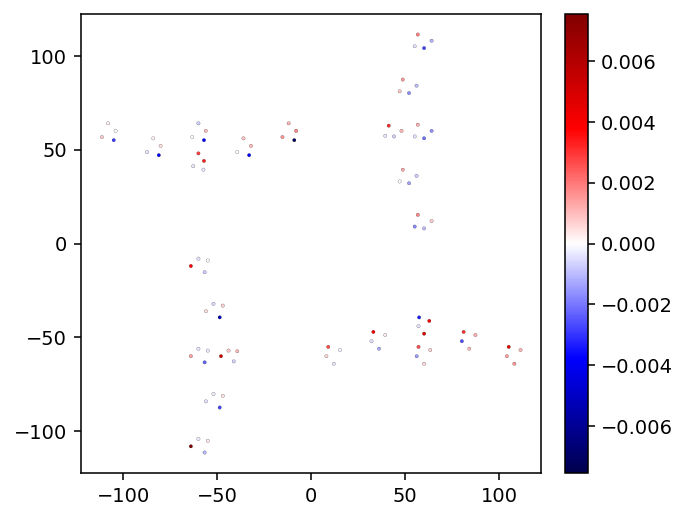

In [29]:
fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["mean-mass_flux"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanRooms', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["mean-sn_prod(abs(u))"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netRooms', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["contResid"], cmap='seismic', edgecolors="black", linewidths=.1, norm = colors.CenteredNorm())
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/residRooms', bbox_inches="tight")

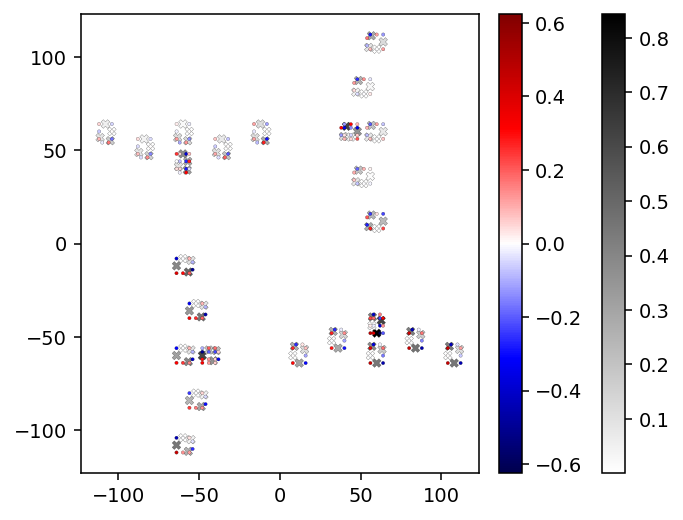

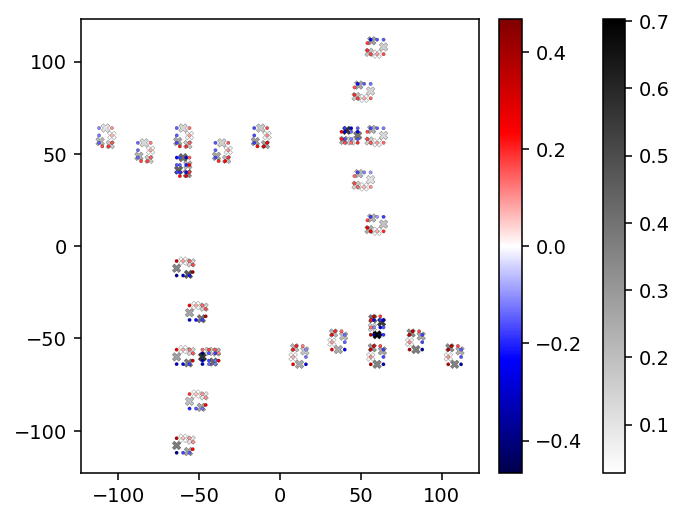

In [30]:
fig, ax=plt.subplots(1, 1, constrained_layout =True)
im1=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=20, c=roomVentilation["mean-mass_flux"], cmap='binary', edgecolors="black", linewidths=.1, marker = 'X')
im2=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["mean-mass_flux"], cmap='seismic', edgecolors="black", linewidths=.1, norm = colors.CenteredNorm())
fig.colorbar(im1)
fig.colorbar(im2)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanWindowsRooms', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im1=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=20, c=roomVentilation["mean-sn_prod(abs(u))"], cmap='binary', edgecolors="black", linewidths=.1, marker = 'X')
im2=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["mean-sn_prod(abs(u))"], cmap='seismic', edgecolors="black", linewidths=.1, norm = colors.CenteredNorm())
fig.colorbar(im1)
fig.colorbar(im2)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netWindowsRooms', bbox_inches="tight")

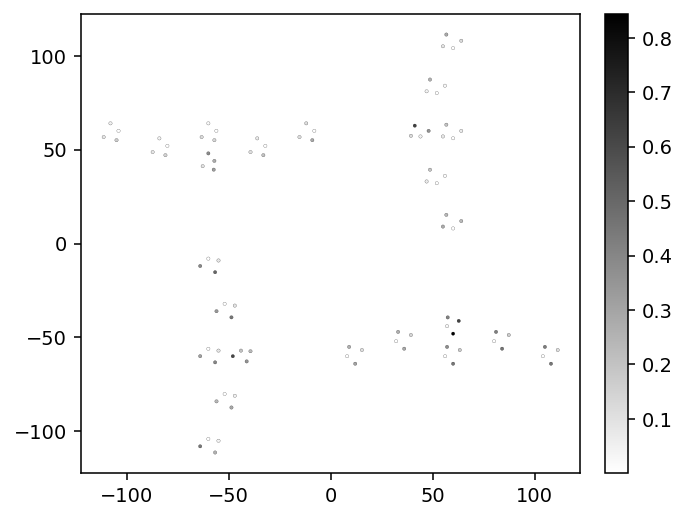

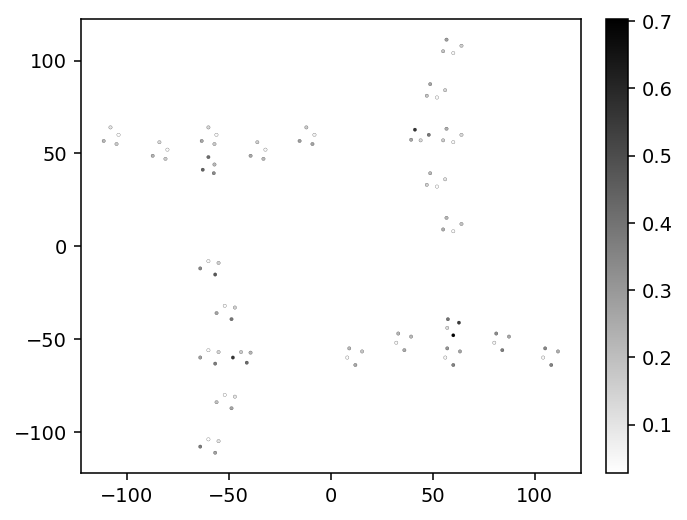

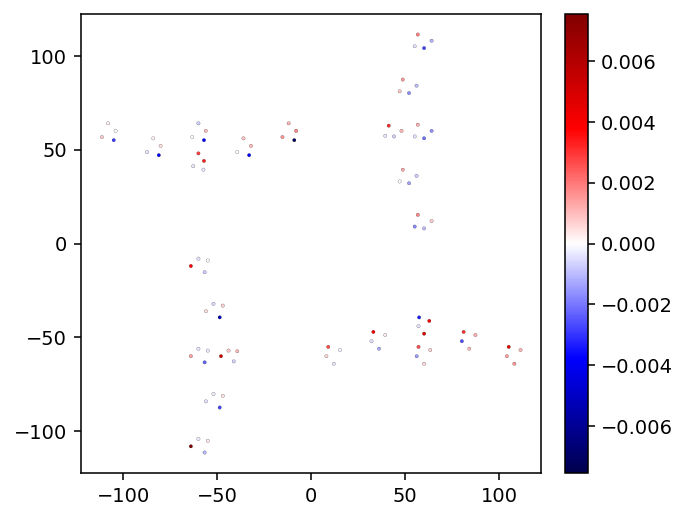

In [31]:
fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["mean-mass_flux"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanRooms', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["mean-sn_prod(abs(u))"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netRooms', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["contResid"], cmap='seismic', edgecolors="black", linewidths=.1, norm = colors.CenteredNorm())
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/residRooms', bbox_inches="tight")

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning:

Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning:

Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning:

16.

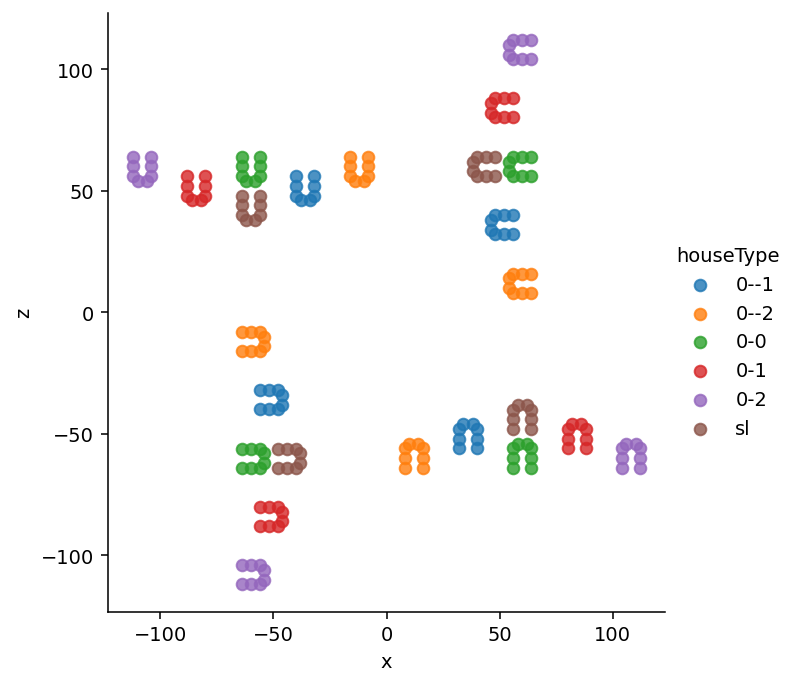

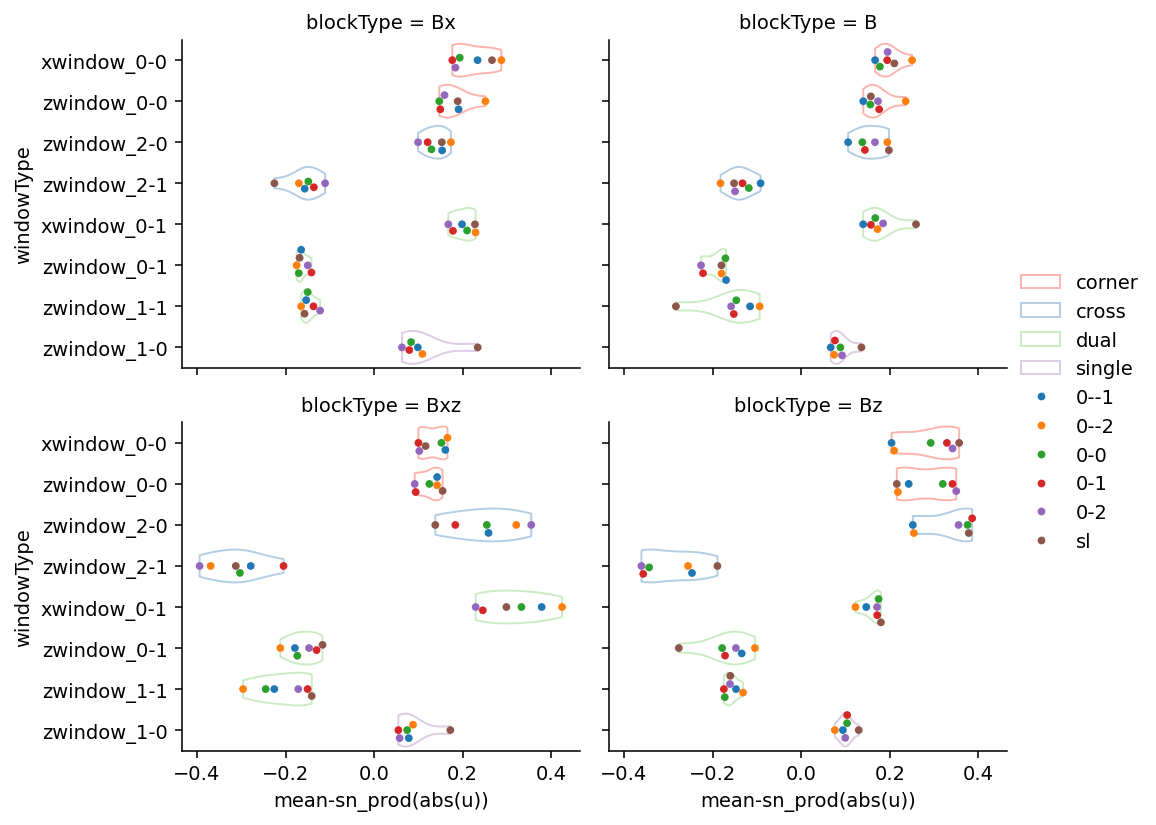

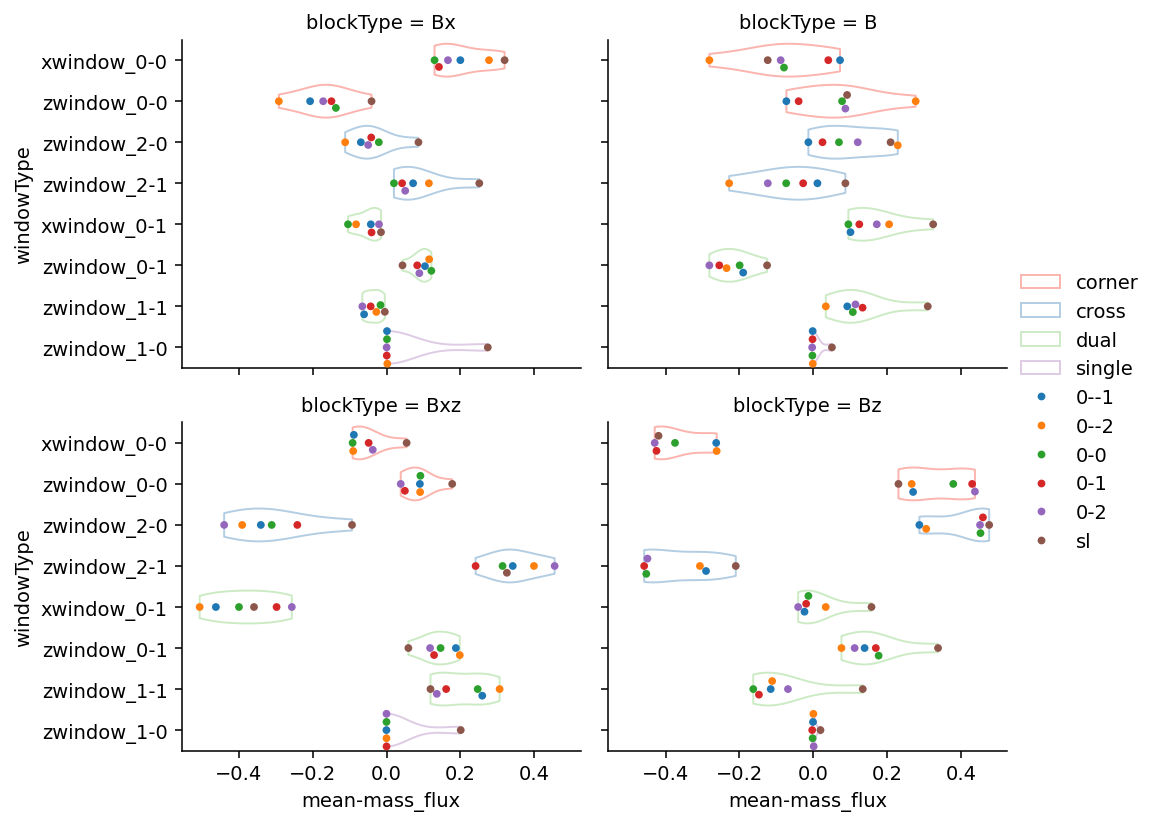

In [32]:
dfWindows = flowStats.loc[flowStats["openingType"].isin(["xwindow", "zwindow"])]

sns.lmplot(data = dfWindows, x = 'x', y = 'z', hue = 'houseType', fit_reg = False, palette = "tab10")
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/windowKeyLayout', bbox_inches="tight", dpi = 300)

g = sns.FacetGrid(dfWindows, col = "blockType", col_wrap = 2, col_order = ["Bx", 'B', "Bxz", "Bz"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "mean-sn_prod(abs(u))", "windowType", "roomType", inner = None, fill = False, palette = "Pastel1", linewidth = 1, density_norm = "width", cut = 0)
# g.map(sns.boxplot, "net", "windowType", color = "1", linewidth = 1, fliersize = 0)
g.map(sns.swarmplot, "mean-sn_prod(abs(u))", "windowType", "houseType", palette = "tab10", size = 4)
g.add_legend()
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netWindowViolins', bbox_inches="tight")

g = sns.FacetGrid(dfWindows, col = "blockType", col_wrap = 2, col_order = ["Bx", 'B', "Bxz", "Bz"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "mean-mass_flux", "windowType", "roomType", inner = None, fill = False, palette = "Pastel1", linewidth = 1, density_norm = "width", cut = 0)
g.map(sns.swarmplot, "mean-mass_flux", "windowType", "houseType", palette = "tab10", size = 4)
g.add_legend()
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanWindowViolins', bbox_inches="tight")

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning:

Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the s

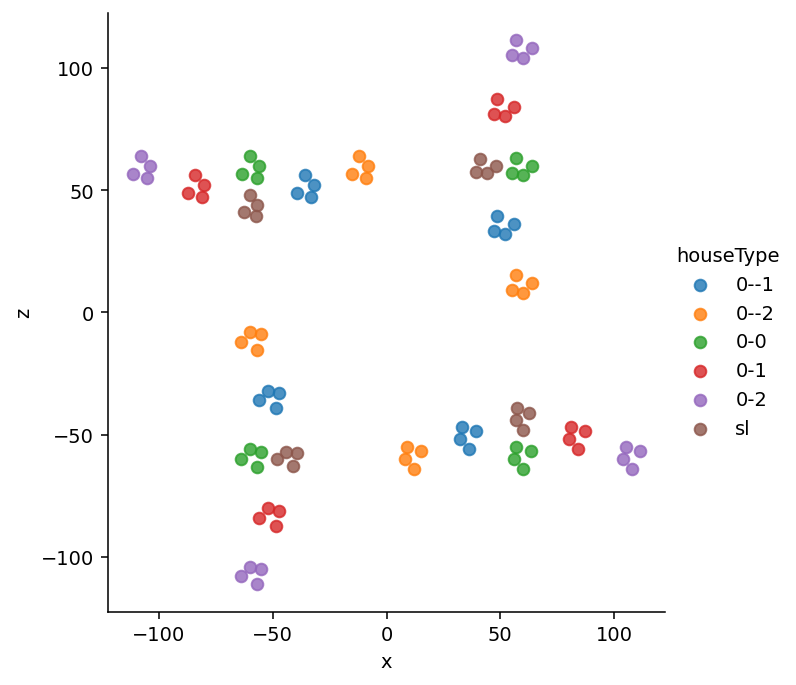

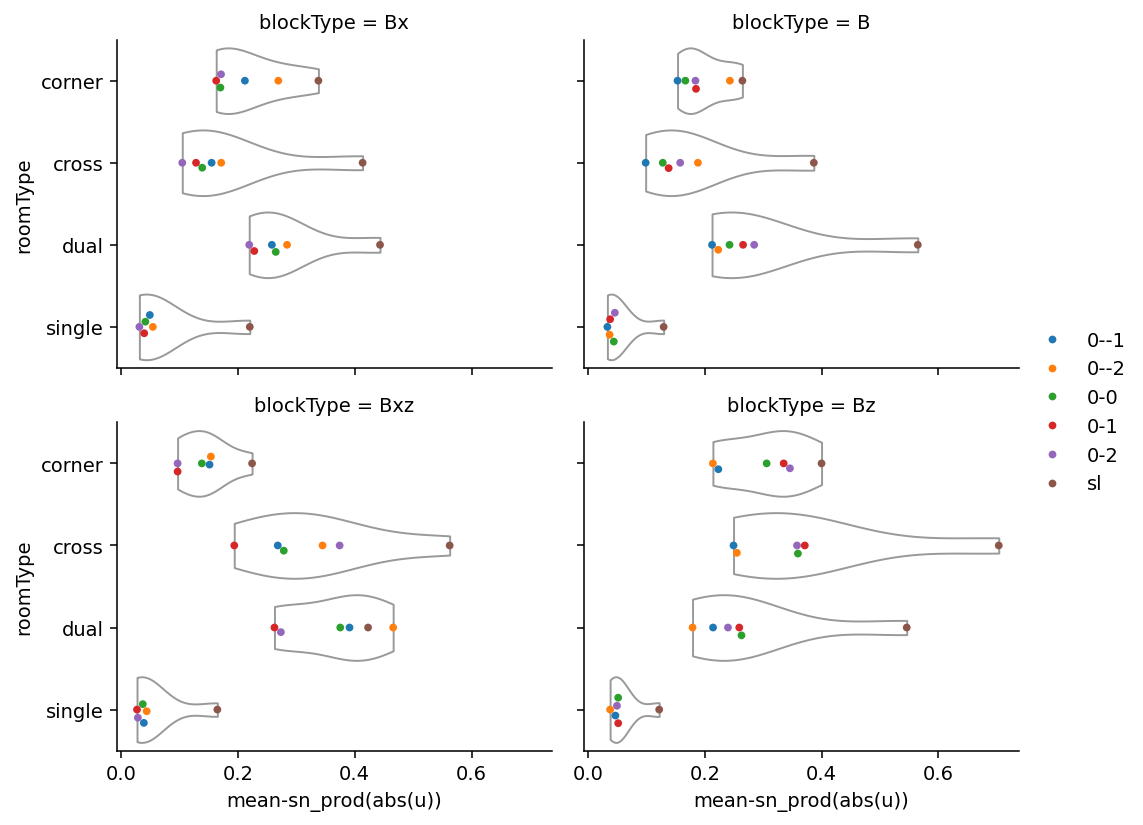

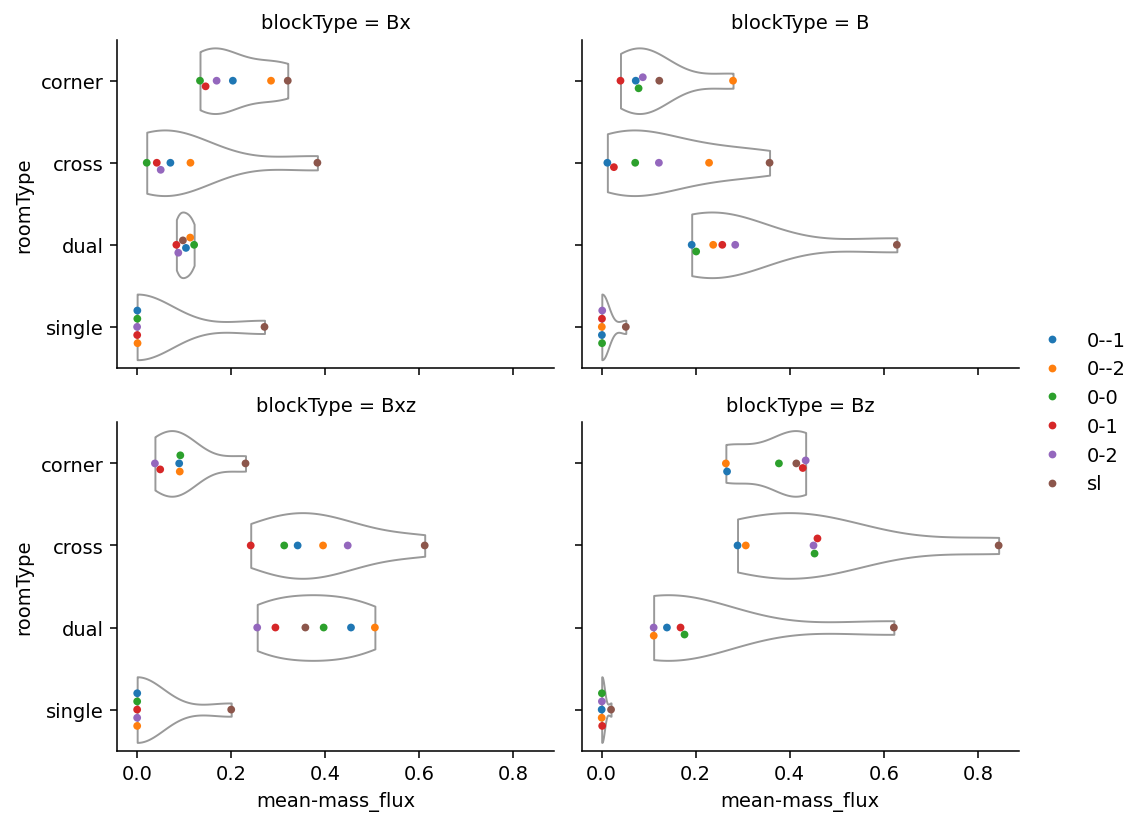

In [33]:
sns.lmplot(data = roomVentilation, x = 'x', y = 'z', hue = 'houseType', fit_reg = False, palette = "tab10")
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/roomKeyLayout', bbox_inches="tight", dpi = 300)

g = sns.FacetGrid(roomVentilation, col = "blockType", col_wrap = 2, col_order = ["Bx", 'B', "Bxz", "Bz"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "mean-sn_prod(abs(u))", "roomType", color = "1", inner = None, linewidth = 1, density_norm = "width", cut = 0)
# g.map(sns.boxplot, "net", "roomType", color = "1", linewidth = 1, fliersize = 0)
g.map(sns.swarmplot, "mean-sn_prod(abs(u))", "roomType", "houseType", palette = "tab10", size = 4)
g.add_legend()
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netRoomViolins', bbox_inches="tight")

g = sns.FacetGrid(roomVentilation, col = "blockType", col_wrap = 2, col_order = ["Bx", 'B', "Bxz", "Bz"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "mean-mass_flux", "roomType", color = "1", inner = None, linewidth = 1, density_norm = "width", cut = 0)
g.map(sns.swarmplot, "mean-mass_flux", "roomType", "houseType", palette = "tab10", size = 4)
g.add_legend()
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanRoomViolins', bbox_inches="tight")

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning:

Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning:

Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.



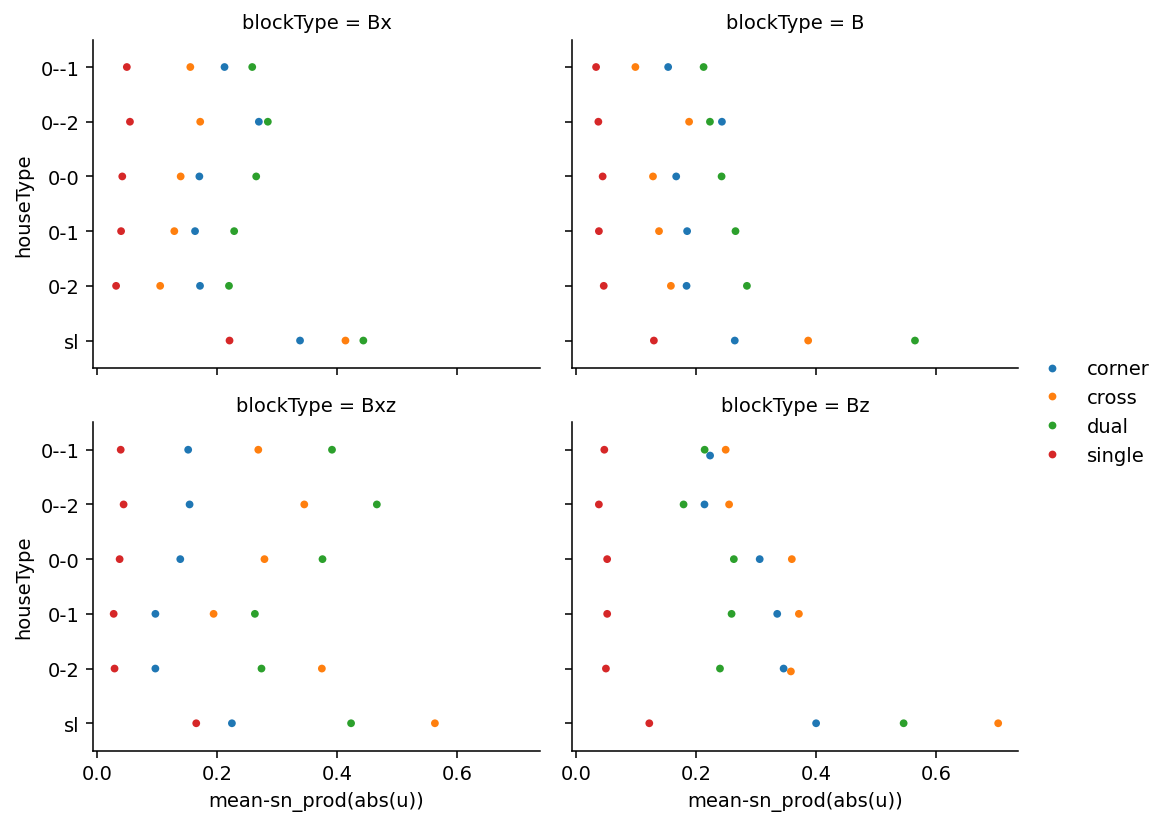

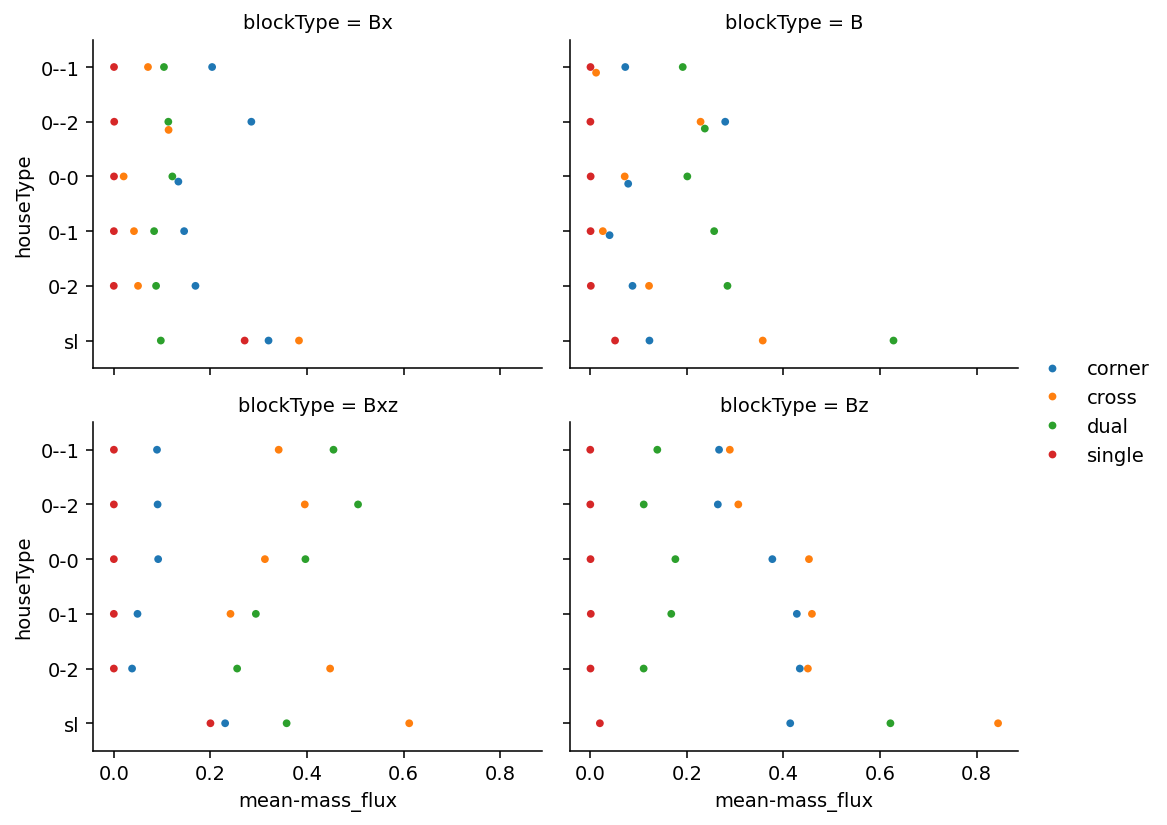

In [34]:
g = sns.FacetGrid(roomVentilation, col = "blockType", col_wrap = 2, col_order = ["Bx", 'B', "Bxz", "Bz"], aspect = 1.25, legend_out = True)
g.map(sns.swarmplot, "mean-sn_prod(abs(u))", "houseType", "roomType", palette = "tab10", size = 4)
g.add_legend()
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netHouseByRoom', bbox_inches="tight")

g = sns.FacetGrid(roomVentilation, col = "blockType", col_wrap = 2, col_order = ["Bx", 'B', "Bxz", "Bz"], aspect = 1.25, legend_out = True)
g.map(sns.swarmplot, "mean-mass_flux", "houseType", "roomType", palette = "tab10", size = 4)
g.add_legend()
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanHouseByRoom', bbox_inches="tight")